In [27]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_train=pd.read_csv("train.csv")

In [3]:
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
df_train=df_train.drop(['CustomerId', 'Surname','id'], axis=1)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 13.9+ MB


Changing Data Types

In [6]:
df_train['Age'] = df_train['Age'].astype('int')

In [7]:
df_train['IsActiveMember'] = df_train['IsActiveMember'].astype('int')

In [8]:
df_train['HasCrCard'] = df_train['HasCrCard'].astype('int')

# Data Visualization

Categorical Features

In [9]:
df_train['Tenure']

0          3
1          1
2         10
3          2
4          5
          ..
165029     2
165030     3
165031     5
165032     7
165033     1
Name: Tenure, Length: 165034, dtype: int64

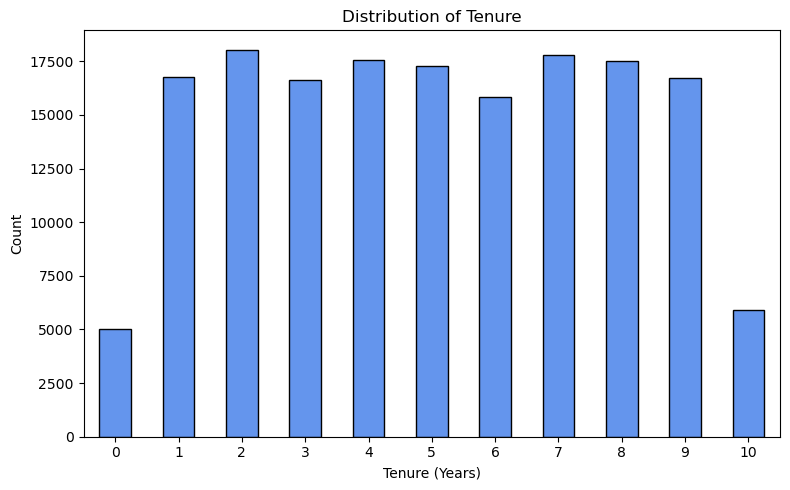

In [10]:
# Plotting the bar chart for Tenure
plt.figure(figsize=(8, 5))
df_train['Tenure'].value_counts().sort_index().plot(kind='bar', color='cornflowerblue',edgecolor='black')

plt.title('Distribution of Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.xticks(rotation=0)
#plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

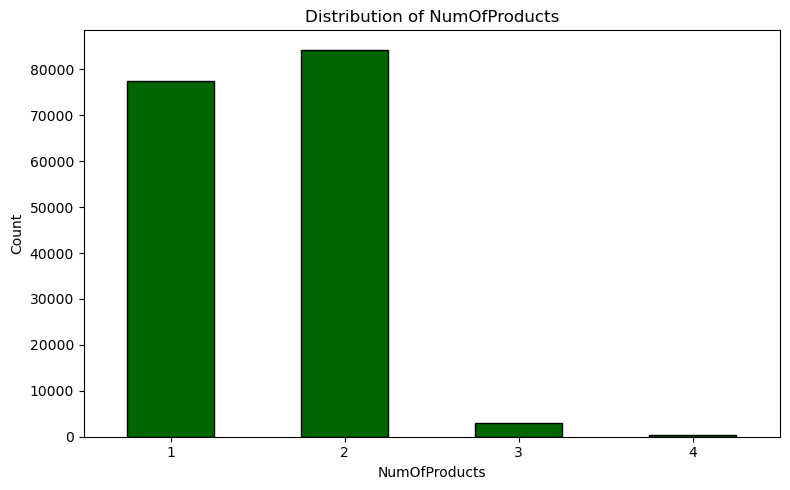

In [11]:
# Plotting the bar chart for Tenure
plt.figure(figsize=(8, 5))
df_train['NumOfProducts'].value_counts().sort_index().plot(kind='bar', color='darkgreen',edgecolor='black')

plt.title('Distribution of NumOfProducts')
plt.xlabel('NumOfProducts')
plt.ylabel('Count')
plt.xticks(rotation=0)
#plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

In [12]:
cat_var=["Gender",'Geography', 'HasCrCard', 'IsActiveMember']

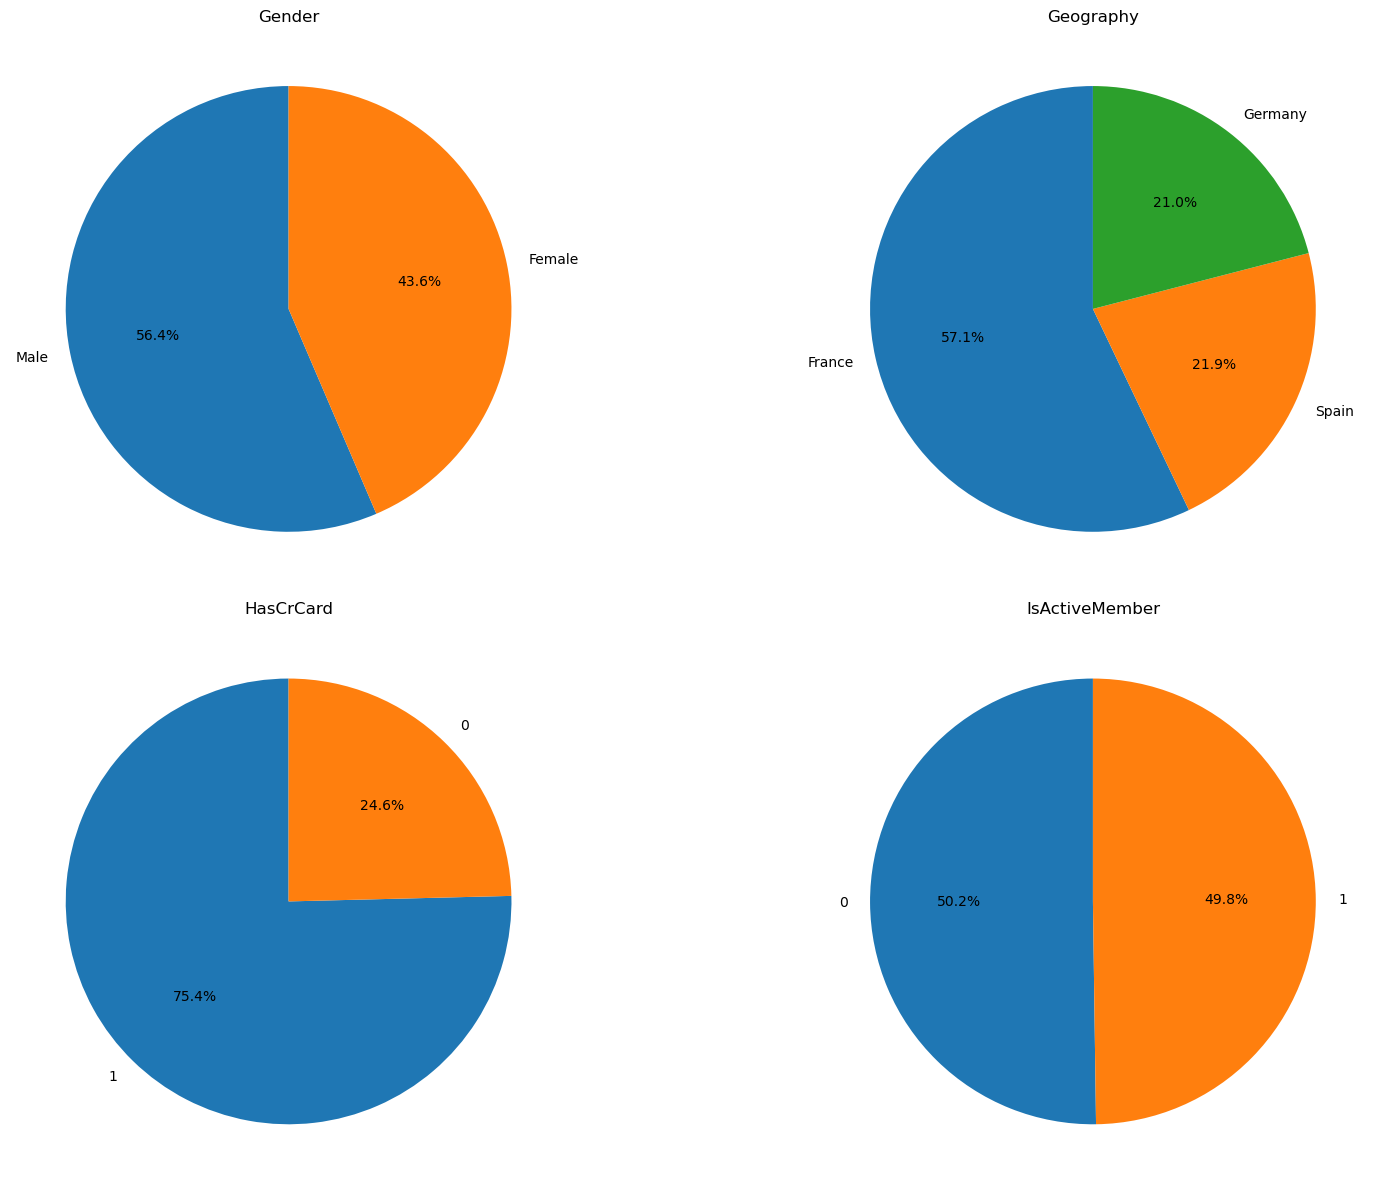

In [13]:
# Set up grid layout 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

# Flatten axes for easier iteration
axes = axes.flatten()

# Generate pie charts
for i, col in enumerate(cat_var):
    ax = axes[i]
    value_counts = df_train[col].value_counts()
    ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'{col}', fontsize=12)

# Remove any unused subplots 
for j in range(len(cat_var), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Numerical Features

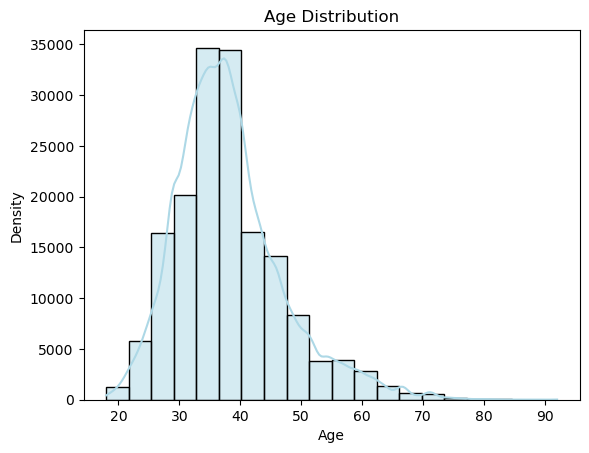

In [14]:
# histogram of Age
sns.histplot(df_train['Age'], bins=20, kde=True, color='lightblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

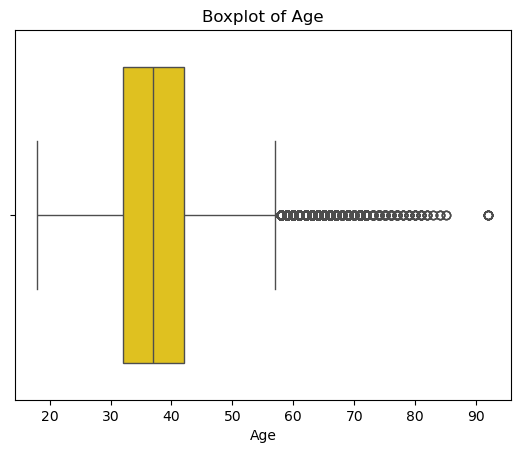

In [15]:
# Boxplot for Age
sns.boxplot(x=df_train['Age'], color='gold')
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

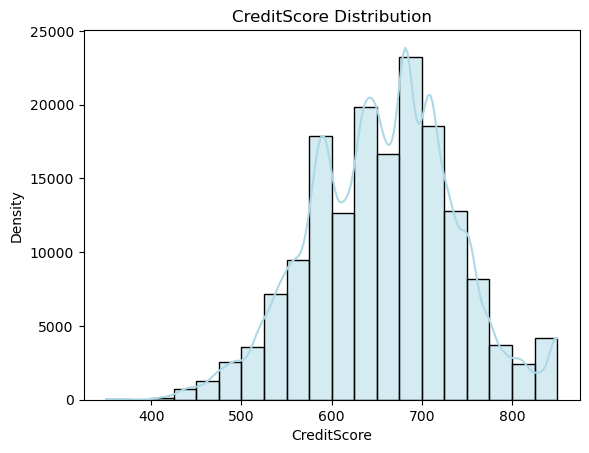

In [16]:
# histogram of CreditScore
sns.histplot(df_train['CreditScore'], bins=20, kde=True, color='lightblue', edgecolor='black')
plt.title('CreditScore Distribution')
plt.xlabel('CreditScore')
plt.ylabel('Density')
plt.show()

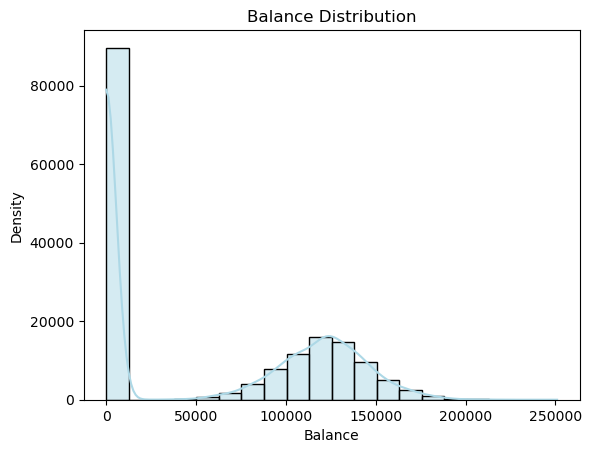

In [17]:
# histogram of CreditScore
sns.histplot(df_train['Balance'], bins=20, kde=True, color='lightblue', edgecolor='black')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.show()

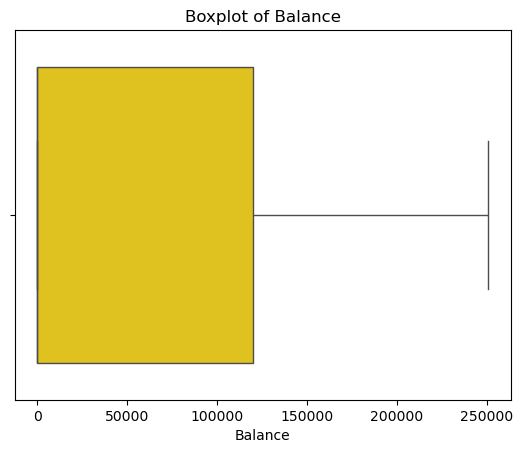

In [18]:
# Boxplot for Balance
sns.boxplot(x=df_train['Balance'], color='gold')
plt.title('Boxplot of Balance')
plt.xlabel('Balance')
plt.show()

In [26]:
df_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance_scaled,EstimatedSalary_scaled
0,668,France,Male,33,3,0.00,2,1,0,181449.97,0,-0.883163,1.369486
1,627,France,Male,33,1,0.00,2,1,1,49503.50,0,-0.883163,-1.254085
2,678,France,Male,40,10,0.00,2,1,0,184866.69,0,-0.883163,1.437422
3,581,France,Male,34,2,148882.54,1,1,1,84560.88,0,1.486918,-0.557018
4,716,Spain,Male,33,5,0.00,2,1,1,15068.83,0,-0.883163,-1.938770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33,2,0.00,1,1,1,131834.75,0,-0.883163,0.382957
165030,792,France,Male,35,3,0.00,1,0,0,131834.45,0,-0.883163,0.382951
165031,565,France,Male,31,5,0.00,1,1,1,127429.56,0,-0.883163,0.295366
165032,554,Spain,Female,30,7,161533.00,1,0,1,71173.03,0,1.688303,-0.823217


In [ ]:
# histogram of CreditScore
sns.histplot(df_train['EstimatedSalary'], bins=20, kde=True, color='lightblue', edgecolor='black')
plt.title('EstimatedSalary Distribution')
plt.xlabel('EstimatedSalary')
plt.ylabel('Density')
plt.show()

### DATA PREPROCESSING

In [ ]:
# Using map to convert Gender to binary
df_train['Gender'] = df_train['Gender'].map({'Male': 1, 'Female': 0})

Scaling EstimatedSalary feature

In [24]:
scaler = StandardScaler()
df_train['EstimatedSalary_scaled'] = scaler.fit_transform(df_train[['EstimatedSalary']])

Scaling Balance

In [21]:
scaler = StandardScaler()
df_train['Balance_scaled'] = scaler.fit_transform(df_train[['Balance']])

In [28]:
scaler = MinMaxScaler()
df_train['Age'] = scaler.fit_transform(df_train[['Age']])

In [29]:
scaler = MinMaxScaler()
df_train['CreditScore'] = scaler.fit_transform(df_train[['CreditScore']])

In [31]:
df_train.to_csv("Train Data.csv",index=False)